In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
day = 3600 * 24
day

df['day']=(df.Time > day)+1
len(df[df.day==1])
len(df[df.day==2])

86400

144787

140020

In [4]:
df['Time_day']=df.Time.apply(lambda x: x if x<=day else x-day)

In [5]:
df['Time_cluster']=pd.cut(df.Time_day,bins=24)

In [6]:
df_new = df.drop(columns=['Time','day','Time_day'])

In [7]:
df_new = pd.get_dummies(df_new)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_0 = df_new[df_new.Class==0]

In [10]:
df_train, df_test_0 = train_test_split(df_0, random_state=0, test_size = 0.120693)

In [11]:
df_train.head()
len(df_train)
df_test_0.head()
len(df_test_0)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,"Time_cluster_(50400.0, 54000.0]","Time_cluster_(54000.0, 57600.0]","Time_cluster_(57600.0, 61200.0]","Time_cluster_(61200.0, 64800.0]","Time_cluster_(64800.0, 68400.0]","Time_cluster_(68400.0, 72000.0]","Time_cluster_(72000.0, 75600.0]","Time_cluster_(75600.0, 79200.0]","Time_cluster_(79200.0, 82800.0]","Time_cluster_(82800.0, 86400.0]"
16534,1.420738,-1.094251,0.656305,-1.454003,-1.563648,-0.345731,-1.218119,0.128614,-1.930794,1.578324,...,0,0,0,0,0,0,0,0,0,0
71061,-0.481275,1.188679,1.346540,-0.021056,0.133936,-0.992413,0.857424,-0.263821,-0.011792,0.022229,...,0,1,0,0,0,0,0,0,0,0
11050,1.110357,0.396123,1.577974,2.709814,-0.401025,0.738637,-0.681952,0.186940,0.983012,0.258410,...,0,0,0,0,0,0,0,0,0,0
41174,-0.302487,-0.337496,1.359826,-2.594041,-0.216970,-0.654382,0.370343,-0.378541,-2.887691,1.122440,...,0,0,0,0,0,0,0,0,0,0
272382,2.047461,-1.231813,-0.518726,-1.505515,-1.238239,-0.442121,-0.998406,-0.013253,0.249211,0.514456,...,0,0,0,0,0,0,0,1,0,0


250000

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,"Time_cluster_(50400.0, 54000.0]","Time_cluster_(54000.0, 57600.0]","Time_cluster_(57600.0, 61200.0]","Time_cluster_(61200.0, 64800.0]","Time_cluster_(64800.0, 68400.0]","Time_cluster_(68400.0, 72000.0]","Time_cluster_(72000.0, 75600.0]","Time_cluster_(75600.0, 79200.0]","Time_cluster_(79200.0, 82800.0]","Time_cluster_(82800.0, 86400.0]"
266085,2.049094,0.186189,-1.707198,0.530768,0.160589,-1.448570,0.239310,-0.353611,0.634425,-0.471390,...,0,0,0,0,0,0,0,1,0,0
172120,2.125540,-0.030714,-1.527653,0.121046,0.543172,-0.347988,0.157221,-0.229126,0.477999,0.046959,...,0,0,0,0,0,0,0,0,0,0
15136,-4.155859,-5.705748,0.274699,-0.993262,-6.059393,5.210848,5.811316,0.367888,1.750710,-4.171672,...,0,0,0,0,0,0,0,0,0,0
96393,-0.566420,-0.579576,0.823503,-1.451240,-0.583587,0.206381,1.601392,-0.370446,-1.910354,0.252497,...,0,0,0,0,1,0,0,0,0,0
208225,0.060858,-0.261762,-1.699493,-1.202327,3.699527,3.196249,0.437208,0.421541,0.492435,-0.455964,...,1,0,0,0,0,0,0,0,0,0


34315

In [12]:
df_test = pd.concat([df_test_0, df_new[df_new.Class==1]])
len(df_test)

34807

In [13]:
from sklearn.utils import shuffle

df_test = shuffle(df_test, random_state=12)

In [14]:
X_train = df_train.drop(columns='Class')
len(X_train)

250000

In [15]:
X_test = df_test.drop(columns='Class')
y_test = df_test.Class

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# H20 Autoencoder

In [17]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
import h2o

In [20]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 mins 09 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,15 days
H2O cluster name:,prodi
H2O cluster total nodes:,1
H2O cluster free memory:,3.973 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [21]:
X_train_h2o = h2o.H2OFrame(X_train)
X_test_h2o = h2o.H2OFrame(X_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
denoised_model = H2OAutoEncoderEstimator(activation="Tanh", 
    hidden=[20,10,5,10,20], l1=1e-4, ignore_const_cols=False, epochs=100)
 
denoised_model.train(training_frame=X_train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [33]:
denoised_test_rec_error = denoised_model.anomaly(X_test_h2o) * 100
denoised_test_rec_error_df = denoised_test_rec_error.as_data_frame()

In [34]:
denoised_test_rec_error_df.describe()

,Reconstruction.MSE
count,34807.000000
mean,0.213972
std,0.481744
min,0.010827
25%,0.062537
50%,0.092787
75%,0.142051
max,7.676604


In [35]:
true_class=pd.DataFrame({'true_class': y_test.values})

In [36]:
error_df_h2o = pd.concat([denoised_test_rec_error_df,true_class],axis=1)
error_df_h2o.rename(columns={'Reconstruction.MSE': 'reconstruction_error'}, inplace=True)
error_df_h2o.describe()

error_df_h2o.head()

,reconstruction_error,true_class
count,34807.000000,34807.000000
mean,0.213972,0.014135
std,0.481744,0.118050
min,0.010827,0.000000
25%,0.062537,0.000000
50%,0.092787,0.000000
75%,0.142051,0.000000
max,7.676604,1.000000


,reconstruction_error,true_class
0,0.122149,0
1,0.145016,0
2,0.136125,0
3,0.097501,0
4,0.060835,0


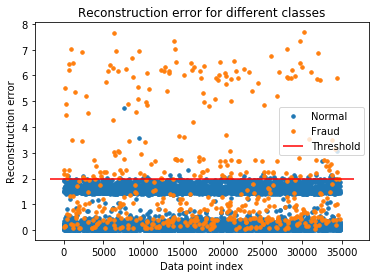

In [39]:
threshold_h2o = 2

groups = error_df_h2o.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_h2o, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

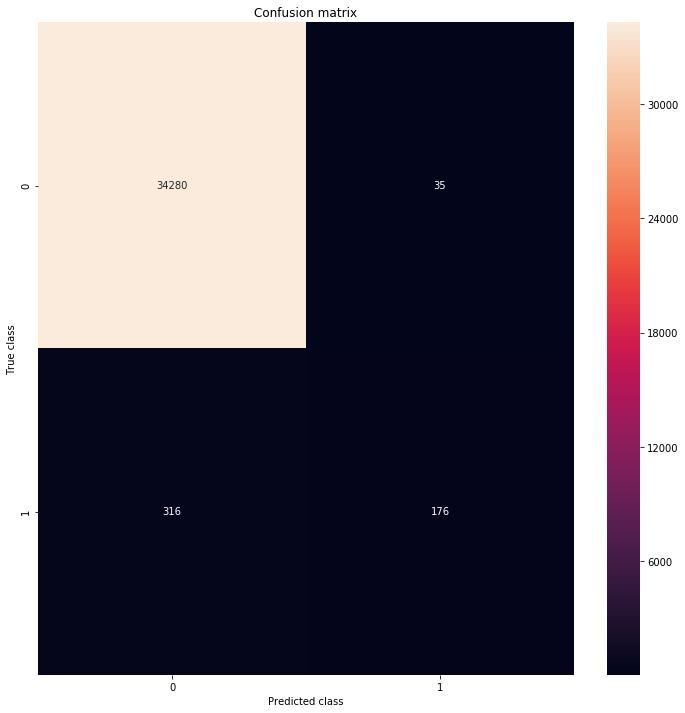

0.5007112375533428

In [40]:
y_pred_h2o = [1 if e > threshold_h2o else 0 for e in error_df_h2o.reconstruction_error.values]
conf_matrix_h2o = confusion_matrix(error_df_h2o.true_class, y_pred_h2o)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_h2o, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_h2o.true_class, y_pred_h2o)

# H2O Pre-trained autoencoder for supervised learning

In [22]:
X = df_new
#y = df_new.Class

#len(X)
#len(y)

In [23]:
train, test = train_test_split(X, random_state=0, test_size = 0.12221, stratify=X.Class)

In [24]:
test.head()
len(test)
len(train)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,"Time_cluster_(50400.0, 54000.0]","Time_cluster_(54000.0, 57600.0]","Time_cluster_(57600.0, 61200.0]","Time_cluster_(61200.0, 64800.0]","Time_cluster_(64800.0, 68400.0]","Time_cluster_(68400.0, 72000.0]","Time_cluster_(72000.0, 75600.0]","Time_cluster_(75600.0, 79200.0]","Time_cluster_(79200.0, 82800.0]","Time_cluster_(82800.0, 86400.0]"
57286,0.897090,-0.224849,0.091052,1.267048,-0.469218,-0.909085,0.440814,-0.266607,-0.002861,-0.061727,...,0,0,0,0,0,0,0,0,0,0
61925,1.136690,-0.775679,0.713119,-0.654121,-1.260787,-0.697379,-0.541589,-0.124737,-1.159504,0.690001,...,0,0,0,0,0,0,0,0,0,0
47605,-4.124893,-3.000977,1.988954,-0.128288,0.828928,-1.400278,-0.162367,-0.239445,1.656449,-0.034424,...,0,0,0,0,0,0,0,0,0,0
67236,-0.539268,-0.328834,0.797263,-2.072748,1.857666,4.103744,0.290617,0.595669,0.937832,-0.622743,...,1,0,0,0,0,0,0,0,0,0
197189,2.148178,-0.884798,-1.245433,-1.100933,-0.294776,-0.124489,-0.651621,-0.080744,-0.552997,0.901167,...,0,0,0,0,0,0,0,0,0,0


34807

250000

In [25]:
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [26]:
train_a,train_d = train_h2o.split_frame(ratios=[0.8], seed=1)

In [27]:
len(train_a)
len(train_d)

200140

49860

In [28]:
train_a['Class'].sum()
train_d['Class'].sum()

333.0

99.0

# Train the autoencoder

In [29]:
colnames = train.columns.tolist()
colnames.remove('Class')
colnames

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_cluster_(-86.4, 3600.0]',
 'Time_cluster_(3600.0, 7200.0]',
 'Time_cluster_(7200.0, 10800.0]',
 'Time_cluster_(10800.0, 14400.0]',
 'Time_cluster_(14400.0, 18000.0]',
 'Time_cluster_(18000.0, 21600.0]',
 'Time_cluster_(21600.0, 25200.0]',
 'Time_cluster_(25200.0, 28800.0]',
 'Time_cluster_(28800.0, 32400.0]',
 'Time_cluster_(32400.0, 36000.0]',
 'Time_cluster_(36000.0, 39600.0]',
 'Time_cluster_(39600.0, 43200.0]',
 'Time_cluster_(43200.0, 46800.0]',
 'Time_cluster_(46800.0, 50400.0]',
 'Time_cluster_(50400.0, 54000.0]',
 'Time_cluster_(54000.0, 57600.0]',
 'Time_cluster_(57600.0, 61200.0]',
 'Time_cluster_(61200.0, 64800.0]',
 'Time_cluster_(64800.0, 68400.0]',
 'Time_cluster_(68400.0, 72000.0]',
 'Time_cluster_(72000.0, 75600.0]',
 'Time_cluster_(75600.0,

In [94]:
#autoencoder = H2OAutoEncoderEstimator(activation="Tanh", 
#    hidden=[20,10,5,10,20], l1=1e-4, ignore_const_cols=False, epochs=100, model_id="ae")
 
#autoencoder.train(x = colnames, training_frame=train_a)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [292]:
# 1234
# 99999999999
# 99999999

autoencoder_2 = H2OAutoEncoderEstimator(activation="Tanh", 
    hidden=[20,10,5,10,20], l1=1e-4, ignore_const_cols=False, epochs=50, model_id="ae_2",reproducible=True,seed=0)
 
autoencoder_2.train(x = colnames, training_frame=train_a)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [293]:
train_d['Class']=train_d['Class'].asfactor()

In [303]:
pretrained_model_2 = H2ODeepLearningEstimator(activation="Tanh", hidden=[20,10,5], epochs=5, reproducible=True,
                                                seed=1234, ignore_const_cols=False, pretrained_autoencoder="ae_2",
                                                mini_batch_size=16,input_dropout_ratio=0.1,rate=0.001,balance_classes=True)
pretrained_model_2.train(x = colnames, y= 'Class', training_frame=train_d)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [304]:
y = test_h2o['Class']
X_test_h2o = test_h2o.drop(['Class'],axis=1)

In [305]:
pred = pretrained_model_2.predict(X_test_h2o)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [306]:
y_prob = pred[:,2]

In [307]:
y_prob

p1
7.06981e-08
5.72947e-08
7.25778e-07
3.85452e-07
6.20576e-07
3.62054e-09
5.45585e-06
1.02156e-07
2.6142e-07
5.16686e-06


In [308]:
pred_threshold=0.5
y_pred = ((y_prob>=pred_threshold)*1).as_data_frame()
y_test = y.as_data_frame()

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

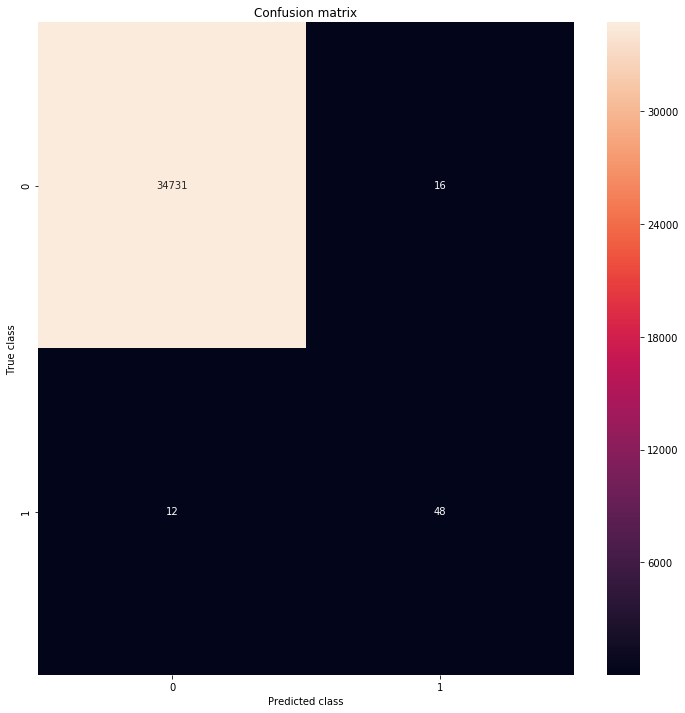

0.7741935483870969

0.9290394374574302

In [309]:
conf_matrix_d = confusion_matrix(y_test.values, y_pred.values)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_d, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_test, y_pred)
roc_auc_score(y_test,y_prob.as_data_frame())

Save the models

In [107]:
model_path_autoencoder = h2o.save_model(model=autoencoder, force=True)
model_path_nn = h2o.save_model(model=pretrained_model, force=True)

## Calculating Cost

In [207]:
df_cost = pd.concat([X_test_h2o.as_data_frame(),y_test.rename(columns={'Class': 'actual'}),y_pred.rename(
    columns={'p1': 'predicted'})],axis=1)

In [227]:
df_cost[(df_cost.actual==0) & (df_cost.predicted==1)].Amount
df_cost[(df_cost.actual==0) & (df_cost.predicted==1)].Amount.sum()
fp_cost = df_cost[(df_cost.actual==0) & (df_cost.predicted==1)].Amount.sum()*0.5
merchant_fee_cost = (1.75/100)*fp_cost

10307     89.99
19339     89.99
20619     89.99
25833    119.99
26554     89.99
32954     89.99
33076    102.00
34004      1.00
Name: Amount, dtype: float64

672.94

In [228]:
df_cost[(df_cost.actual==1) & (df_cost.predicted==0)].Amount
df_cost[(df_cost.actual==1) & (df_cost.predicted==0)].Amount.sum()
fn_cost = df_cost[(df_cost.actual==1) & (df_cost.predicted==0)].Amount.sum()

1174      354.33
2323        1.00
3182        1.79
5155        3.93
10306     237.26
10716       1.00
13786       7.18
15565       7.06
15919       1.00
17331       0.00
19061      33.76
25973       5.09
26029     105.99
32074    1096.99
33237     108.51
Name: Amount, dtype: float64

1964.89

In [229]:
total_cost = fp_cost + merchant_fee_cost + fn_cost
total_cost

2307.2482250000003

In [225]:
def total_fraud_cost(X,y_actual,y_pred):
    
    df_cost = pd.concat([X,y_actual.rename(columns={y_test.columns[0] : 'actual'}),y_pred.rename(
    columns={y_pred.columns[0]: 'predicted'})],axis=1)
    
    fp_cost = df_cost[(df_cost.actual==0) & (df_cost.predicted==1)].Amount.sum()*0.5
    merchant_fee_cost = (1.75/100)*fp_cost
    fn_cost = df_cost[(df_cost.actual==1) & (df_cost.predicted==0)].Amount.sum()
    total_cost = fp_cost + merchant_fee_cost + fn_cost
    return total_cost

In [310]:
total_fraud_cost(X_test_h2o.as_data_frame(),y_test,y_pred)

2592.5145624999996